In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import glob

import utils

In [63]:
def viz_all_envs(fn_plot_env):
    plt.figure(figsize=(20, 20))
    for i_plot, env_id in enumerate(tqdm(utils.env_ids_104_ignore)):
        plt.subplot(10, 10, i_plot+1)
        fn_plot_env(env_id)
    plt.tight_layout()
    plt.show()

In [64]:
def plot_cells_vs_cmplx(env_id):
    n_cells, cmplxs = [], []
    for f in sorted(glob.glob(f'./data/egb_goexplore_rand/{env_id}_*.npy'))[:]:
        archive = np.load(f, allow_pickle=True).item()
        config = archive['config']
        h, w, d = config['h'], config['w'], config['d']
        cmplx = (h+w+d)/3
        cmplxs.append(cmplx)
        n_cells.append(len(archive['traj']))
    plt.scatter(cmplxs, n_cells)
    
    n_cells, cmplxs = [], []
    for f in sorted(glob.glob(f'./data/egb_goexplore/{env_id}_*.npy'))[:]:
        archive = np.load(f, allow_pickle=True).item()
        config = archive['config']
        h, w, d = config['h'], config['w'], config['d']
        cmplx = (h+w+d)/3
        cmplxs.append(cmplx)
        n_cells.append(len(archive['traj']))
    plt.scatter(cmplxs, n_cells)
    plt.title(env_id)

  0%|          | 0/100 [00:00<?, ?it/s]

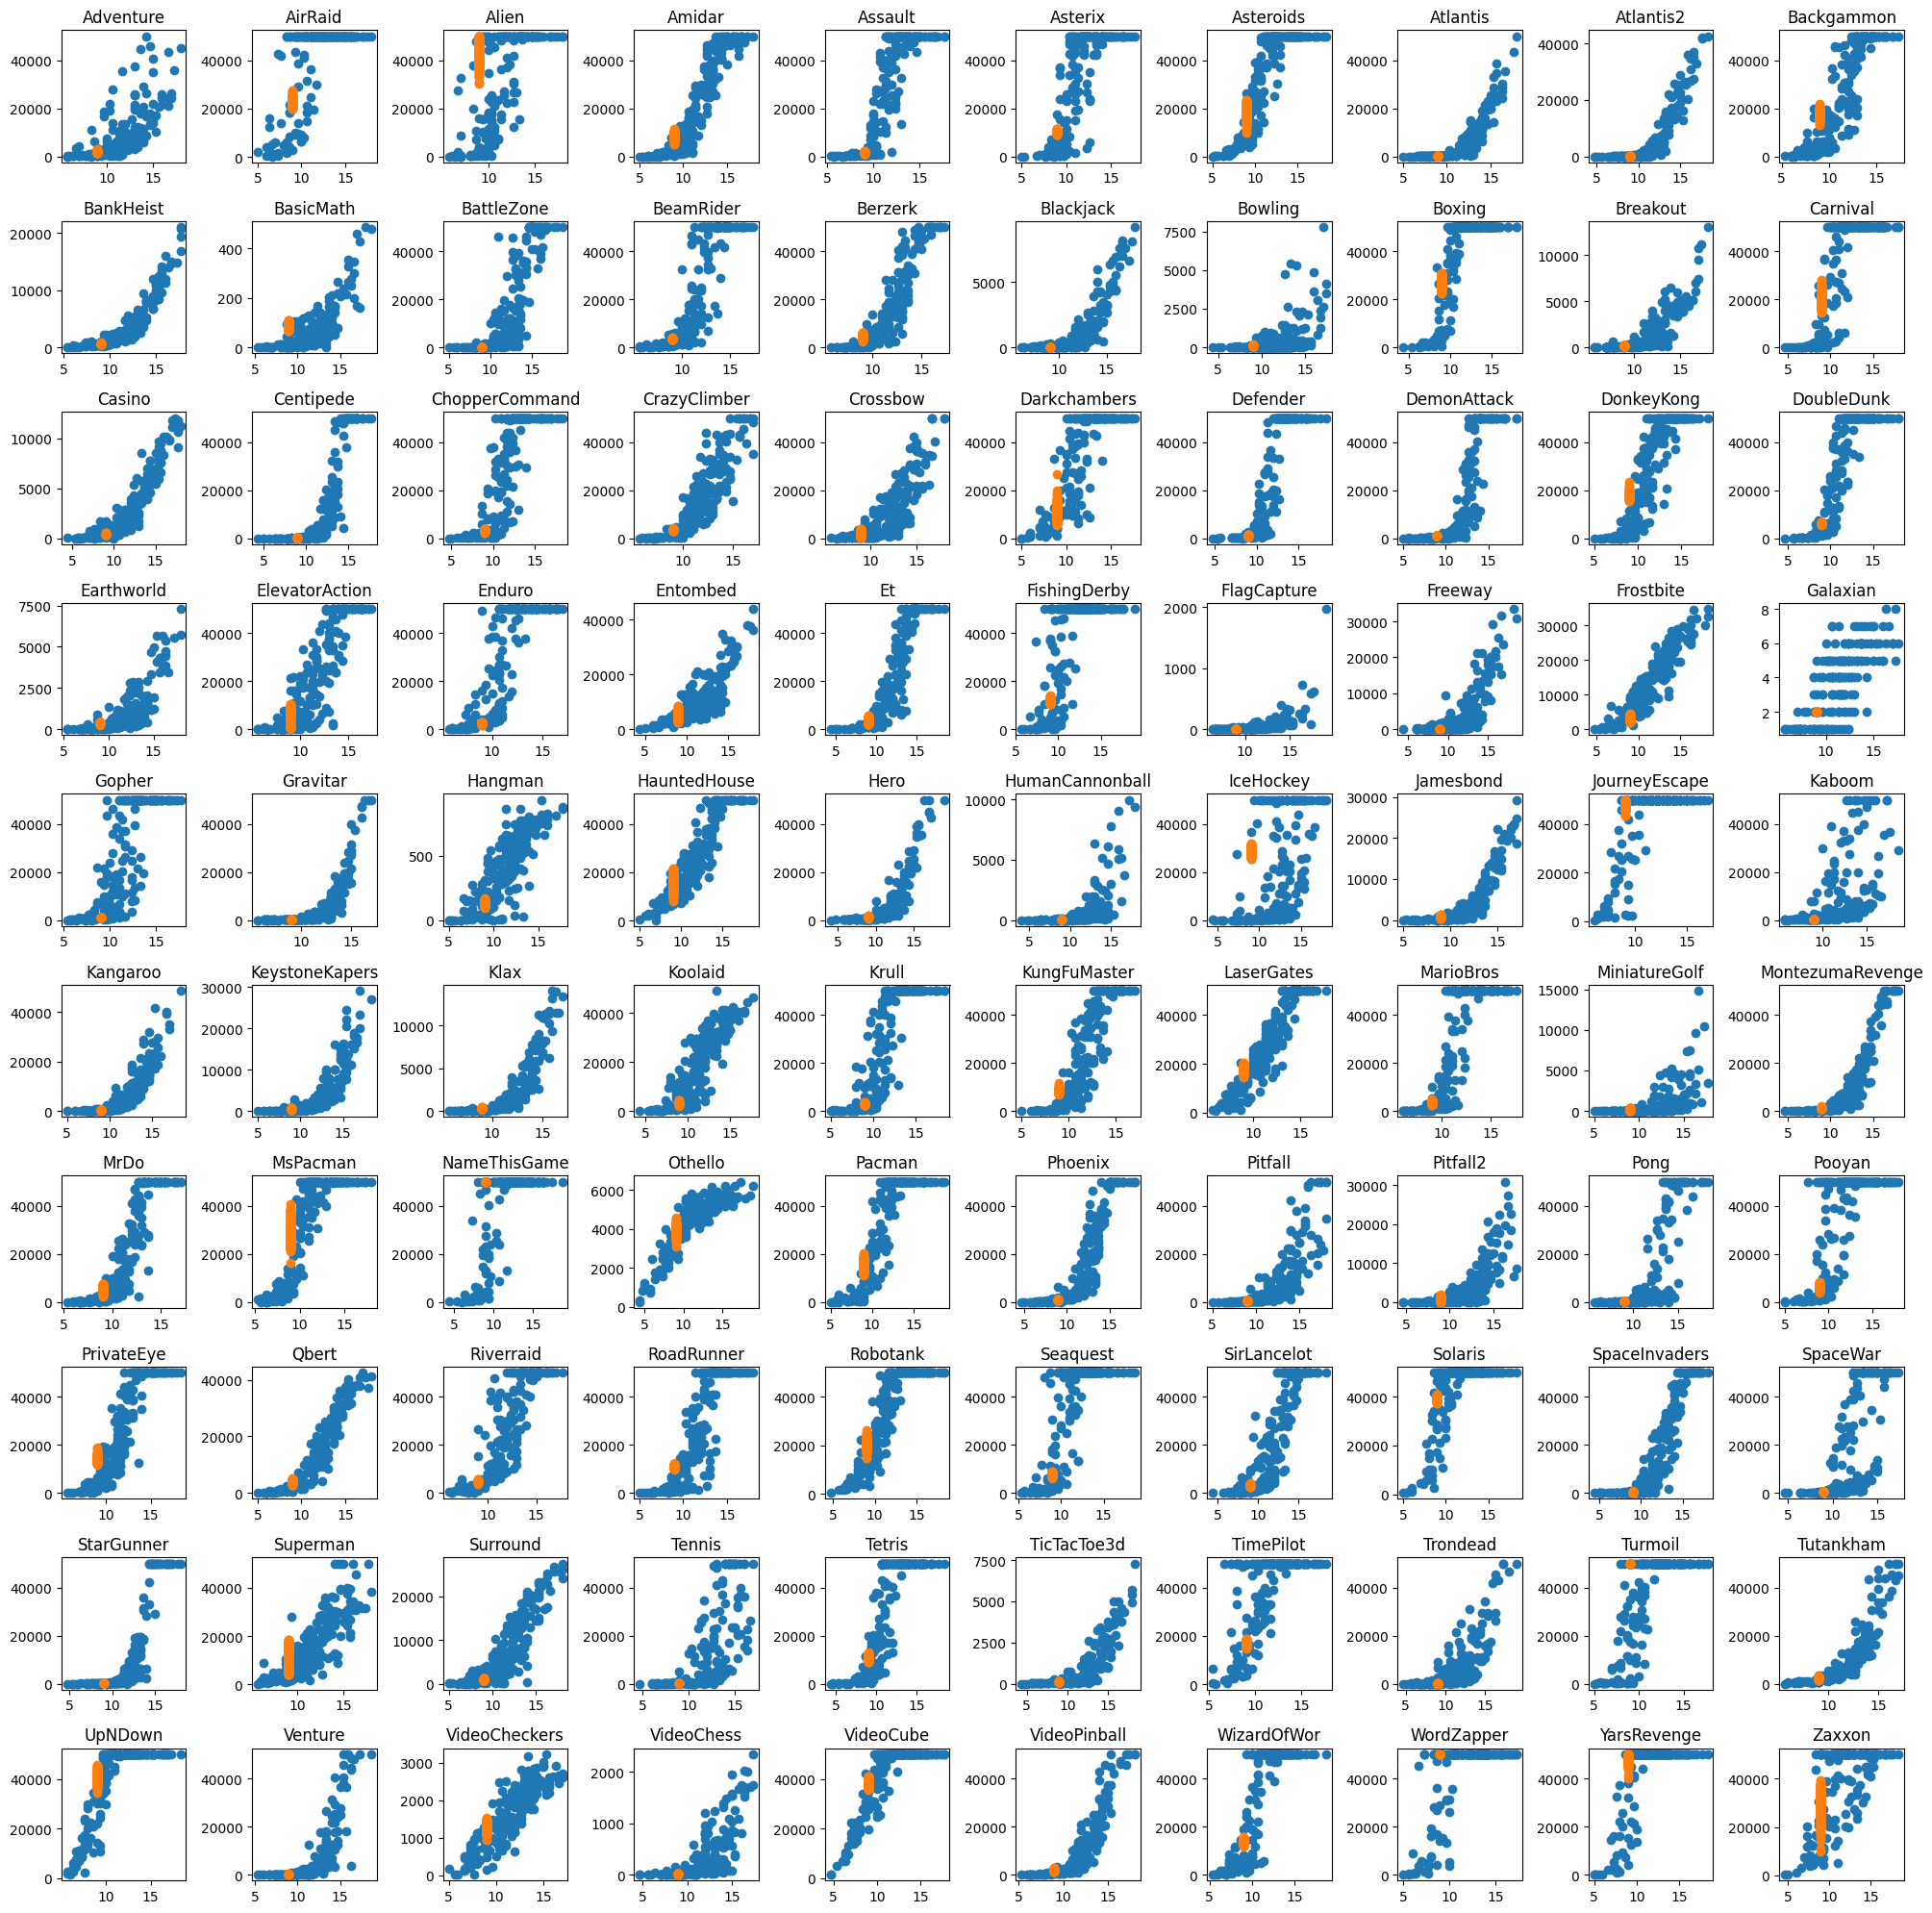

In [65]:
viz_all_envs(plot_cells_vs_cmplx)

In [91]:
env_id2archives = {}
for env_id in tqdm(utils.env_ids_104_ignore):
    env_id2archives[env_id] = []
    for f in sorted(glob.glob(f'./data/egb_goexplore/{env_id}_*.npy'))[:]:
        archive = np.load(f, allow_pickle=True).item()
        env_id2archives[env_id].append(archive)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

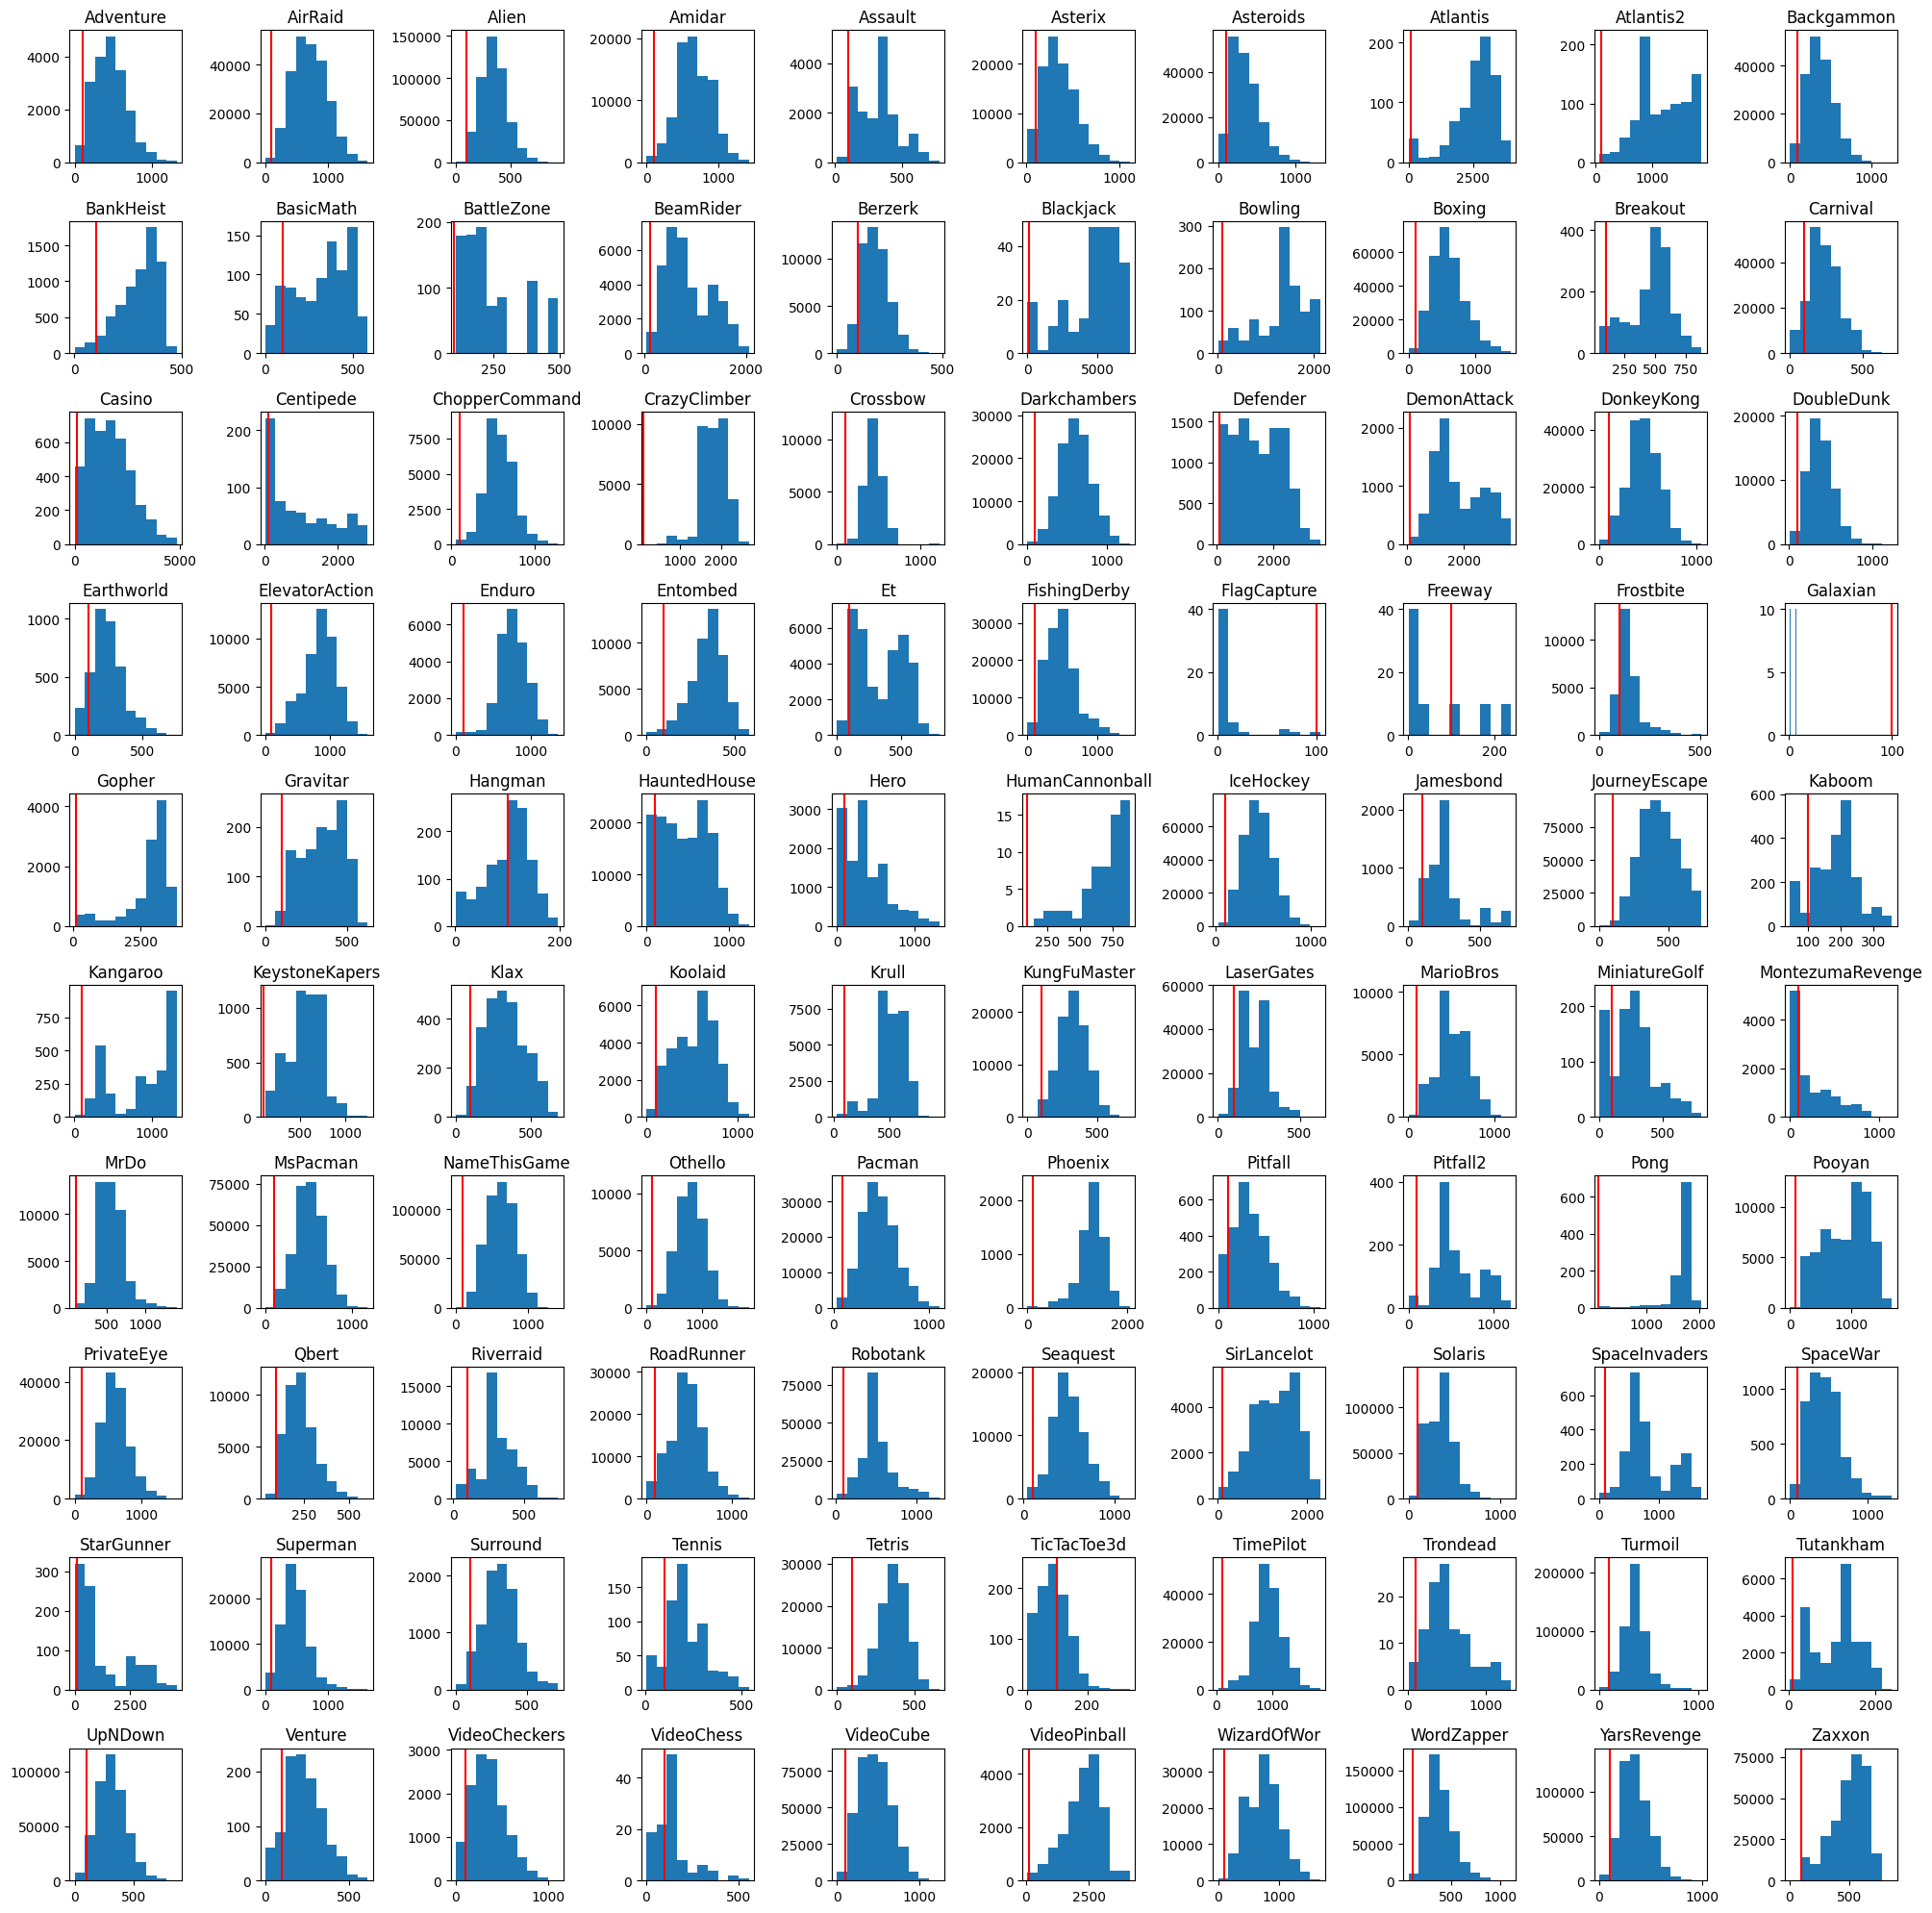

In [171]:
def temp(env_id):
    archives = env_id2archives[env_id]
    tlens = []
    for archive in archives[::20]:
        trajs = archive['traj']
        tlens.extend([len(traj) for traj in trajs])
    plt.hist(tlens)
    plt.axvline(100, c='r')
    plt.title(env_id)
    
viz_all_envs(temp)

In [173]:
archives = env_id2archives['Galaxian']

In [174]:
for archive in archives:
    trajs = archive['traj']
    tlens = [len(traj) for traj in trajs]
    print(tlens)

[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]
[1, 7]

In [195]:
from my_envs import *

In [196]:
env = MyEnvpool('Galaxian-v5', num_envs=1, stack_num=1)

In [197]:
obs, info = env.reset();
for _ in tqdm(range(10000)):
    obs, _, _, _, _ = env.step(env.action_space.sample())

  0%|          | 0/10000 [00:00<?, ?it/s]

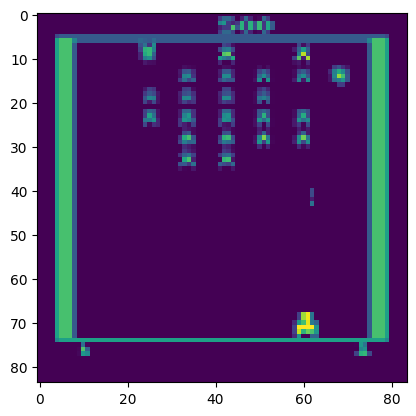

In [198]:
plt.imshow(obs[0, 0])

In [95]:
import time
for _ in range(5):
    for _ in tqdm(range(100), desc='desc'):
        time.sleep(0.01)

desc:   0%|          | 0/100 [00:00<?, ?it/s]

desc:   0%|          | 0/100 [00:00<?, ?it/s]

desc:   0%|          | 0/100 [00:00<?, ?it/s]

desc:   0%|          | 0/100 [00:00<?, ?it/s]

desc:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
tqdm(total=len(iter), desc=desc)

In [160]:
desc2pbar = {}

class MyTqdm:
    def __init__(self, obj, desc='something'):
        self.obj = obj
        self.iter = obj.__iter__()
        if desc not in desc2pbar:
            desc2pbar[desc] = tqdm(self, desc=desc)
        self.pbar = desc2pbar[desc]
    
    def __iter__(self):
        self.pbar.reset(total=len(self.obj))
        return self
        
    def __next__(self):
        a = self.iter.__next__()
        self.pbar.update()
        return a
        
    def __len__(self):
        return self.obj.__len__()

for _ in range(5):
    for i in MyTqdm(range(10), desc='wtf'):
        time.sleep(.1)


wtf:   0%|          | 0/10 [00:00<?, ?it/s]

In [157]:
len(MyTqdm(range(10)))

10

In [150]:
for _ in range(5):
    for i in tqdm(range(10), desc='desc'):
        time.sleep(.1)

desc:   0%|          | 0/10 [00:00<?, ?it/s]

desc:   0%|          | 0/10 [00:00<?, ?it/s]

desc:   0%|          | 0/10 [00:00<?, ?it/s]

desc:   0%|          | 0/10 [00:00<?, ?it/s]

desc:   0%|          | 0/10 [00:00<?, ?it/s]

In [152]:
pbar = tqdm(desc='desc')
for _ in range(5):
    pbar.reset(total=10)
    for i in range(10):
        pbar.update()
        time.sleep(.1)

desc: 0it [00:00, ?it/s]

In [206]:
a = "Adventure AirRaid Alien Amidar Asterix Atlantis Atlantis2 Backgammon BankHeist BasicMath BattleZone BeamRider Berzerk Blackjack Breakout Carnival Casino Centipede ChopperCommand CrazyClimber Crossbow Darkchambers Defender DemonAttack DonkeyKong DoubleDunk Earthworld ElevatorAction Enduro Entombed Et FishingDerby Freeway Gopher Gravitar Hangman HauntedHouse Hero HumanCannonball Jamesbond JourneyEscape Kaboom KeystoneKapers Klax Koolaid Krull LaserGates MarioBros MiniatureGolf MontezumaRevenge MrDo Othello Pacman Phoenix Pitfall Pitfall2 Pong Pooyan PrivateEye Qbert Riverraid Robotank Seaquest SirLancelot SpaceInvaders SpaceWar Superman Tennis Tetris TicTacToe3d TimePilot Trondead Turmoil Tutankham UpNDown Venture VideoCheckers VideoChess VideoCube VideoPinball WizardOfWor WordZapper YarsRevenge Zaxxon"

In [208]:
a.split()[52]

'Pacman'